#### See the annualized returns vary by choosing different start dates

In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
def getData():
    # Get the historical monthly returns from MSCI World
    df = pd.read_csv('~/data/retirement/benchmark/MSCI_world-v1.csv')
    df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
    df.rename(columns={'Date': 'date', 'MSCI World': 'value'}, inplace=True)
    return df

In [3]:
def filterDate(startDT):
    # Filter by date, format yyyy-mm-01. Earliest is 1978-12-01
    return df[df['date'] >= startDt]

In [8]:
def getRate(df):
    # Return the average monthly growth rate
    initVal = df.iloc[0]['value']
    finalVal = df.iloc[-1]['value']
    numMonths = len(df)-1
    return npf.rate(nper=numMonths, pmt=0, pv=-initVal, fv=finalVal)

In [9]:
def calcMetrics(df, numYears=None):
    # Compute the monthly growth rate of MSCI plus the std dev of monthly returns
    if numYears:
        tmp = df[:numYears*12]
    else:
        tmp = df
    rate = getRate(tmp)
    # Compute the Standard Deviation of monthly returns
    df['prev'] = df['value'].shift(1)
    df['pctChg'] = (df['value']-df['prev'])/df['prev']
    std = df['pctChg'].std()
    return rate, std

##### Loop through different start dates and compute return

In [10]:
years = [str(x) for x in range(1979, 2019)]
dates = [x+'-01-01' for x in years]

In [16]:
print("MSCI return annualized, given a start date")
print("\nStartDt    Return     Std Dev")
df = getData()
l = []
for startDt in dates:
    df = filterDate(startDt)
    monthlyGrowthRate, std = calcMetrics(df)
    fv = npf.fv(monthlyGrowthRate, nper=12, pmt=0, pv=-100)
    annualRt = (fv-100)/100
    l.append(std)
    print("{:<12}{:<8.1%}{:.3}".format(startDt, annualRt, std))

MSCI return annualized, given a start date

StartDt    Return     Std Dev
1979-01-01  10.9%   0.043
1980-01-01  11.0%   0.0432
1981-01-01  10.5%   0.0433
1982-01-01  10.3%   0.0432
1983-01-01  9.9%    0.0431
1984-01-01  9.1%    0.0433
1985-01-01  8.7%    0.0431
1986-01-01  8.7%    0.0433
1987-01-01  8.3%    0.0434
1988-01-01  8.7%    0.0425
1989-01-01  7.9%    0.0426
1990-01-01  8.1%    0.0426
1991-01-01  9.1%    0.0416
1992-01-01  8.8%    0.0415
1993-01-01  9.0%    0.0417
1994-01-01  8.0%    0.0416
1995-01-01  8.8%    0.0419
1996-01-01  8.3%    0.0424
1997-01-01  7.9%    0.0429
1998-01-01  7.0%    0.0428
1999-01-01  6.6%    0.0419
2000-01-01  5.5%    0.0416
2001-01-01  5.8%    0.0412
2002-01-01  6.9%    0.0402
2003-01-01  9.8%    0.0377
2004-01-01  9.1%    0.0376
2005-01-01  9.3%    0.0386
2006-01-01  8.4%    0.039
2007-01-01  8.3%    0.0398
2008-01-01  10.0%   0.0399
2009-01-01  14.0%   0.0372
2010-01-01  13.0%   0.0357
2011-01-01  12.2%   0.0362
2012-01-01  13.4%   0.036
2013-01-01 

In [17]:
pd.Series(l).mean()

0.0408871348086045

In [31]:
print("MSCI annualized return, rolling 10 years")
df = getData()
l = []
numYears=10
for startDt in dates:
    df = filterDate(startDt)
    monthlyGrowthRate, std = calcMetrics(df, numYears)
    fv = npf.fv(monthlyGrowthRate-1, nper=12, pmt=0, pv=-100)
    annualRt = (fv-100)/100
    l.append(annualRt)
    print("{:<12}{:.1%}".format(startDt, annualRt))

MSCI annualized return, rolling 10 years
1979-01-01  21.0%
1980-01-01  22.0%
1981-01-01  14.7%
1982-01-01  15.3%
1983-01-01  12.5%
1984-01-01  11.7%
1985-01-01  8.8%
1986-01-01  9.6%
1987-01-01  8.8%
1988-01-01  12.3%
1989-01-01  10.6%
1990-01-01  14.7%
1991-01-01  16.6%
1992-01-01  13.1%
1993-01-01  8.3%
1994-01-01  5.6%
1995-01-01  7.7%
1996-01-01  8.1%
1997-01-01  7.1%
1998-01-01  4.0%
1999-01-01  -2.4%
2000-01-01  -3.0%
2001-01-01  -1.0%
2002-01-01  0.3%
2003-01-01  6.3%
2004-01-01  6.3%
2005-01-01  7.7%
2006-01-01  6.3%
2007-01-01  6.5%
2008-01-01  8.9%
2009-01-01  12.7%
2010-01-01  13.1%
2011-01-01  11.5%
2012-01-01  14.6%
2013-01-01  13.4%
2014-01-01  12.9%
2015-01-01  10.9%
2016-01-01  13.0%
2017-01-01  11.8%
2018-01-01  12.4%


<AxesSubplot:>

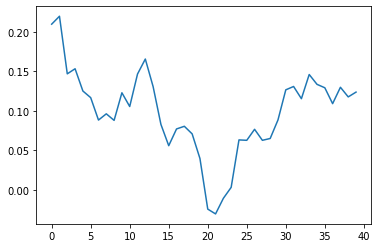

In [38]:
pd.Series(l).plot()

<AxesSubplot:>

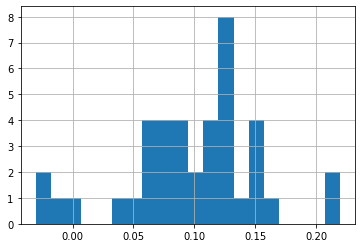

In [41]:
pd.Series(l).hist(bins=20)